




### **3.12 Reaching a Specific Code Line**

Question: Explain the circumstances under which the line of code marked `printf("LINE J")` in Figure 3.33 will be reached.

Answer:The printf("LINE J") line will be reached only under one specific condition: if the execlp() system call in the child process fails. The execlp() function only returns if an error has occurred (e.g., the "/bin/ls" command is not found). If execlp() is successful, it replaces the child process's memory space with the new program ("ls"), and the child process never returns to execute the subsequent printf statement. Therefore, "LINE J" will be printed to the screen only if the execlp command fails to execute.







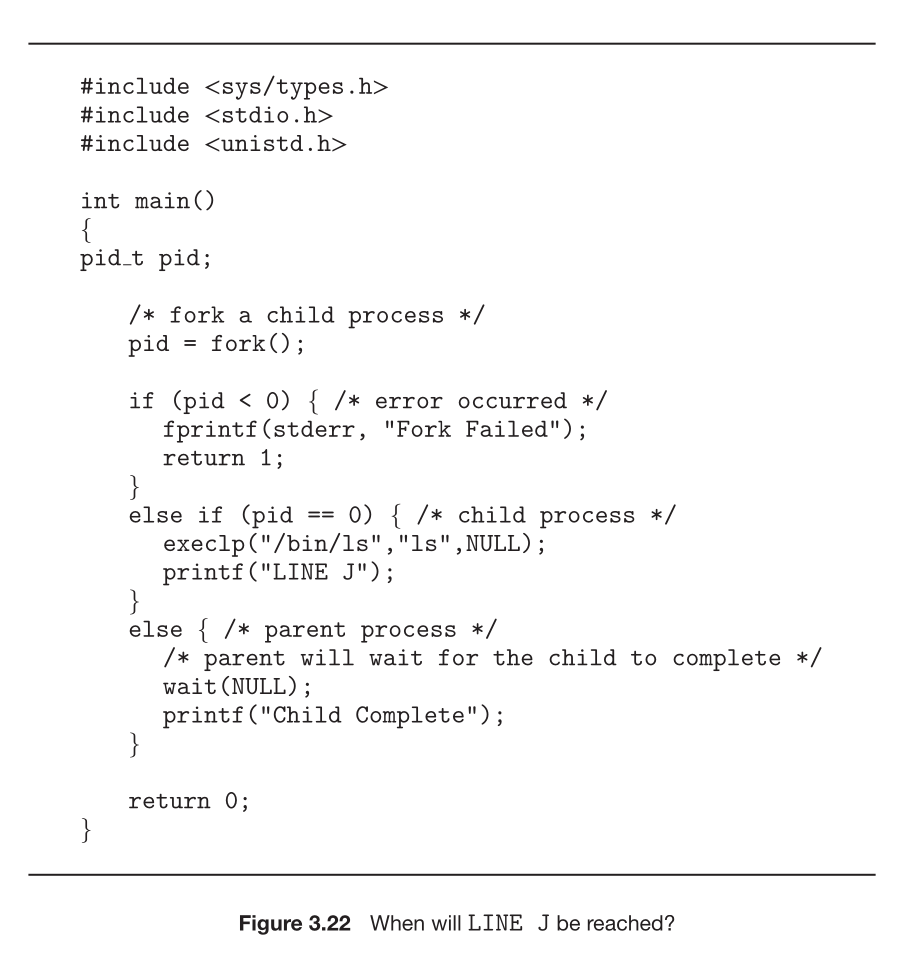

















### **3.14 Ordinary Pipes vs. Named Pipes**

Question: Give an example of a situation in which ordinary pipes are more suitable than named pipes and an example of a situation in which named pipes are more suitable than ordinary pipes.

Answer:
*   **Ordinary Pipes are more suitable:** For simple, sequential communication between related processes, such as connecting the standard output of one program to the standard input of another in a shell command (e.g., `ls | grep "test"`). Their simplicity and automatic cleanup are advantages in this confined context.
*   **Named Pipes are more suitable:** For communication between unrelated processes that need to share data over time. For example, a logging server and multiple, independently started client applications. Any client can write a log message to the named pipe (FIFO) at any time, and the server can read from it, without requiring a parent-child relationship.















### **3.17 Communication Mechanism Trade-offs**

Question: What are the benefits and the disadvantages of each of the following? Consider both the system level and the programmer level.

**a. Synchronous and Asynchronous Communication**
*   **Synchronous (Blocking):**
    *   **Benefits:** Simplifies programming by providing a clear sequence of events (send then receive, or vice versa). The sender knows the message has been received.
    *   **Disadvantages:** Can lead to poor performance and deadlocks if processes are waiting for each other. Reduces concurrency.

*   **Asynchronous (Non-blocking):**
    *   **Benefits:** Increases concurrency and system throughput; the sender is not blocked and can continue processing immediately.
    *   **Disadvantages:** More complex for the programmer, who must use application-level techniques to confirm receipt and manage message buffers. Can lead to message loss if buffers are full.

**b. Automatic and Explicit Buffering**
*   **Automatic Buffering:**
    *   **Benefits:** Eases programmer burden as the system manages queueing. A sender can often proceed without immediate waiting, even if no receiver is ready.
    *   **Disadvantages:** Requires the system to manage potentially unlimited buffer space, which can consume large amounts of kernel memory and obscure resource constraints.

*   **Explicit Buffering:**
    *   **Benefits:** Gives programmers and the system fine-grained control over resources. Prevents unbounded memory usage.
    *   **Disadvantages:** Places the burden on the programmer to design for fixed buffer sizes, which can lead to blocking (if buffers are full) or complex flow-control logic.

**c. Send by Copy and Send by Reference**
*   **Send by Copy:**
    *   **Benefits:** Safer and simpler for the programmer. Changes made by the receiver do not affect the sender's data, preventing unintended side-effects.
    *   **Disadvantages:** Less efficient for large messages, as it requires duplicating the entire data structure, consuming more CPU time and memory.

*   **Send by Reference:**
    *   **Benefits:** Highly efficient for large messages, as only a pointer (reference) is passed, saving time and memory.
    *   **Disadvantages:** Introduces complexity and risk. The sender and receiver now share memory, which requires careful synchronization to avoid race conditions and makes the sender's data vulnerable to changes by the receiver.

**d. Fixed-sized and Variable-sized Messages**
*   **Fixed-sized Messages:**
    *   **Benefits:** Simplifies system-level implementation (e.g., memory management, packetization in networks) and eliminates internal fragmentation.
    *   **Disadvantages:** Inconvenient for the programmer, who must break down large messages into packets and reassemble them, or deal with unused space in messages smaller than the fixed size.

*   **Variable-sized Messages:**
    *   **Benefits:** More natural and flexible for the programmer, who can send data of any size without extra processing.
    *   **Disadvantages:** More complex for the operating system to manage, potentially leading to external memory fragmentation and more complex buffer allocation strategies.




## **3.3 Complications of Concurrent Processing**

Question: Original versions of Apple’s mobile iOS operating system provided no means of concurrent processing. Discuss three major complications that concurrent processing adds to an operating system.

Answer:
a. The CPU scheduler must be aware of the different concurrent processes and must choose an appropriate algorithm for scheduling them.
b. Concurrent processes often need to communicate with one another, requiring the operating system to provide methods for interprocess communication.
c. With limited memory on devices, poor memory management by one process can negatively impact others, so the OS must carefully manage memory to support multiple concurrent processes.


## **3.5 Shared Process Memory after fork()**

Question: When a process creates a new process using the `fork()` operation, which of the following states is shared between the parent process and the child process?
a. Stack
b. Heap
c. Shared memory segments

Answer: Only the shared memory segments are shared between the parent process and the newly forked child process. Copies of the stack and the heap are made for the newly created process.

## **3.6 "Exactly Once" RPC Semantics with Lost ACK**

Question: Consider the “exactly once” semantic with respect to the RPC mechanism. Does the algorithm for implementing this semantic execute correctly even if the ACK message sent back to the client is lost due to a network problem? Describe the sequence of messages, and discuss whether “exactly once” is still preserved.

Answer: Yes, "exactly once" is still preserved. The client sends an RPC with a timestamp and starts a timer. If the ACK is lost, the client times out and resends the RPC with a new timestamp. When the server receives this duplicate RPC, it uses the timestamp to identify it as a duplicate, does not re-execute the procedure, and resends the ACK. This sequence ensures the remote procedure is executed exactly once.
